<a href="https://colab.research.google.com/github/KOdunga/MITIDSS/blob/main/v2Employeeattrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Scientist Employee Attrition

Predict the probability that a candidate is looking for a new job and interpret the main factors that affect an employee's decision whether to continue or to attrite

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introductory Steps 
**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/DSML/Data.csv')

In [4]:
#Checking the number of rows and columns in the data
Data.shape

(19158, 14)

- The datasheet has 19,158 rows and 14 columns

### Data Overview

In [5]:
Data.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [6]:
Data.tail()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollee_id             19158 non-null  int64  
 1   City                    19158 non-null  object 
 2   City_development_index  19158 non-null  float64
 3   Gender                  14650 non-null  object 
 4   Relevent_experience     19158 non-null  object 
 5   Enrolled_university     18772 non-null  object 
 6   Education_level         18698 non-null  object 
 7   Major_discipline        16345 non-null  object 
 8   Experience              19093 non-null  object 
 9   Company_size            13220 non-null  object 
 10  Company_type            13018 non-null  object 
 11  Last_new_job            18735 non-null  object 
 12  Training_hours          19158 non-null  int64  
 13  Target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

- There are 19,158 observations and 14 columns in the data
- 10 columns are of the object data type and 4 columns are numerical 

In [8]:
#Check for duplicate values
Data.duplicated().sum()

0

In [9]:
#Check for missig values in the data
round(Data.isna().sum()/Data.isna().count()*100,2)

Enrollee_id                0.00
City                       0.00
City_development_index     0.00
Gender                    23.53
Relevent_experience        0.00
Enrolled_university        2.01
Education_level            2.40
Major_discipline          14.68
Experience                 0.34
Company_size              30.99
Company_type              32.05
Last_new_job               2.21
Training_hours             0.00
Target                     0.00
dtype: float64

In [10]:
Data['Target'].value_counts(1)

0    0.750652
1    0.249348
Name: Target, dtype: float64

In [11]:
#Show the statistical summary of the numerical columns
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [12]:
#Check the number of unique values in the columns
Data.nunique()

Enrollee_id               19158
City                        123
City_development_index       93
Gender                        3
Relevent_experience           2
Enrolled_university           3
Education_level               5
Major_discipline              6
Experience                   22
Company_size                  8
Company_type                  6
Last_new_job                  6
Training_hours              241
Target                        2
dtype: int64

- Enrolee ID is unique identifier for students, it can be dropped
- City column has 123 unique categories

In [13]:
for i in Data.describe(include=['object']).columns:
  print('Unique values in', i, 'are: ')
  print(Data[i].value_counts(1)*100)
  print('*'*50)

Unique values in City are: 
city_103    22.732018
city_21     14.103769
city_16      8.001879
city_114     6.973588
city_160     4.410690
              ...    
city_129     0.015659
city_111     0.015659
city_121     0.015659
city_140     0.005220
city_171     0.005220
Name: City, Length: 123, dtype: float64
**************************************************
Unique values in Gender are: 
Male      90.245734
Female     8.450512
Other      1.303754
Name: Gender, dtype: float64
**************************************************
Unique values in Relevent_experience are: 
Has relevent experience    71.990813
No relevent experience     28.009187
Name: Relevent_experience, dtype: float64
**************************************************
Unique values in Enrolled_university are: 
no_enrollment       73.604304
Full time course    20.013850
Part time course     6.381845
Name: Enrolled_university, dtype: float64
**************************************************
Unique values in Education_level 

- Over 90% of employees in this data set are male, so it is highly gender skewed
- 70% of the employees did not enroll in any of the courses
-  Theer are very few employees with Masters degrees and PhDs
- Almost 75% of the employees are from private companies

## Data Preprocessing

In [14]:
Data.drop(columns = 'Enrollee_id', inplace = True)

## EDA

**Univariate Analysis**

In [15]:
#Function to plot a boxplot and histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12,7),kde=False, bins = None):
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows= 2,
      sharex = True,
      gridspec_kw={'height_ratios': (0.25,0.75)},
      figsize= figsize,    
  )
  sns.boxplot(
      data=data, x = feature, ax = ax_box2, showmeans = True, color= 'violet'
   )
  sns.histplot(
      data=data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette= 'winter'
  ) if bins else sns.histplot(
      data=data, x = feature, kde = kde, ax = ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(),color = 'green', linestyle='--'
  )
  ax_hist2.axvline(
      data[feature].median(),color = 'black', linestyle='-'
  )

In [16]:
Data.dtypes

City                       object
City_development_index    float64
Gender                     object
Relevent_experience        object
Enrolled_university        object
Education_level            object
Major_discipline           object
Experience                 object
Company_size               object
Company_type               object
Last_new_job               object
Training_hours              int64
Target                      int64
dtype: object

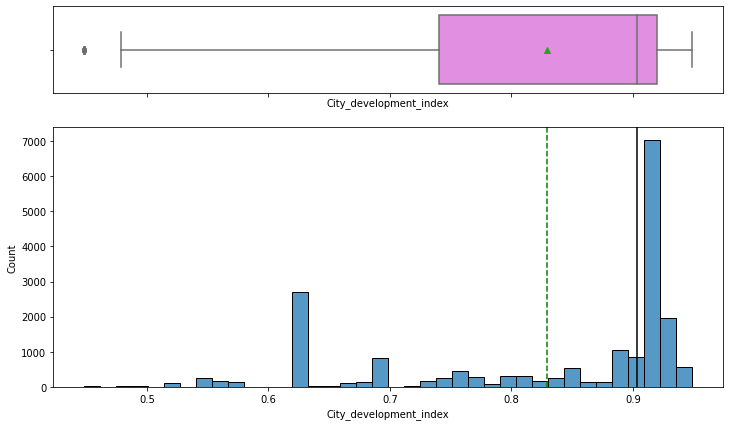

In [17]:
histogram_boxplot(Data, 'City_development_index')

- There are many people from cities with a development index more than 0.9

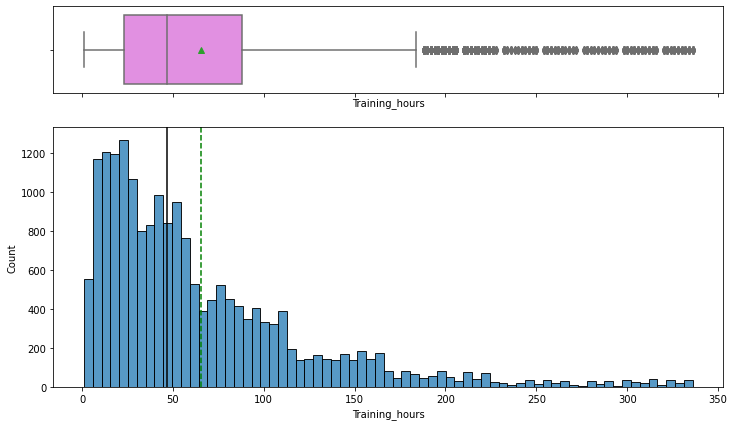

In [18]:
histogram_boxplot(Data, 'Training_hours')

- Dataset has a mean of 70 with so many outliers to the right

In [19]:
#Function to create labeled barplots
def labeled_barplot(data, feature, perc = False, n= None):
  total = len(data[feature])
  count= data[feature].nunique()
  if n is None:
    plt.figure(figsize =(count+1, 5))
  else:
    plt.figure(figsize=(n+1,5))
  
  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(
      data= data,
      x = feature,
      palette='Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
  )

  for p in ax.patches:
    if perc == True:
      label = '{:1.f}'.format(
          100*p.get_height()/total
      )
    else:
      label = p.get_height()
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.annotate(
        label,
        (x,y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0,5),
        textcoords = 'offset points'
    )
  plt.show()

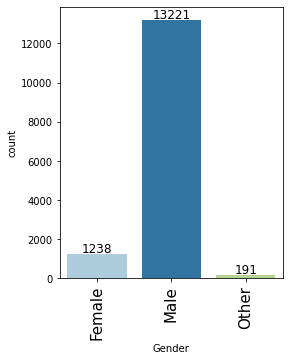

In [20]:
labeled_barplot(Data,'Gender')

- We have far more males than females in the data set
- In data sets related to people, gender balance is critical and so this skew may affect the output negatively

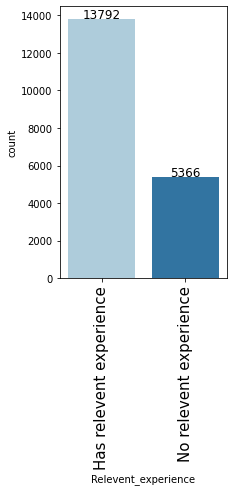

In [21]:
labeled_barplot(Data,'Relevent_experience')

- Most of the employees have relevant prior experience

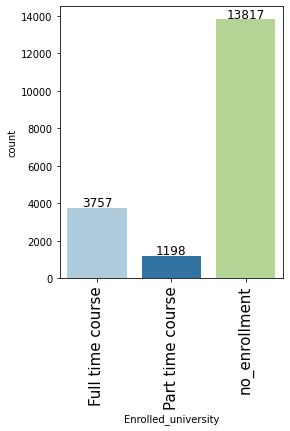

In [22]:
labeled_barplot(Data,'Enrolled_university')

- Most of the employeed in the dataset have not enrolled for university
- Only 6% of the employees have enrolled in part-time courses

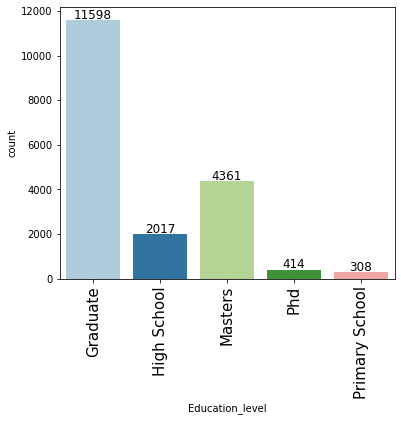

In [23]:
labeled_barplot(Data,'Education_level')

- A majority of the employees are graduate with masters degree qualifiers
- We have very few employees with basic primary school education 

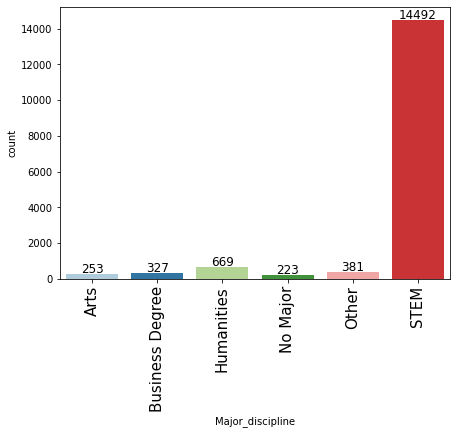

In [24]:
labeled_barplot(Data,'Major_discipline')

- Approximately 88% of employees have opted for STEM as their major discipline

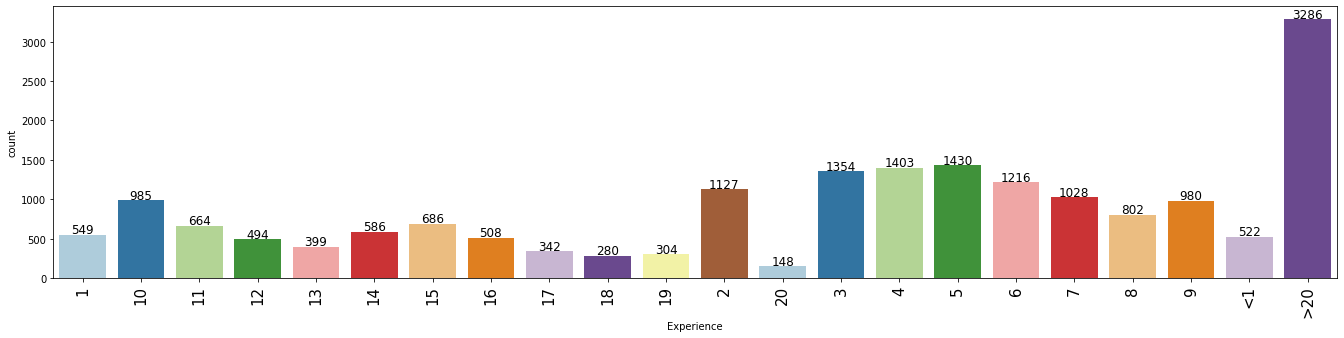

In [25]:
labeled_barplot(Data,'Experience')

- Most employees have a work experience of greater than 20 years

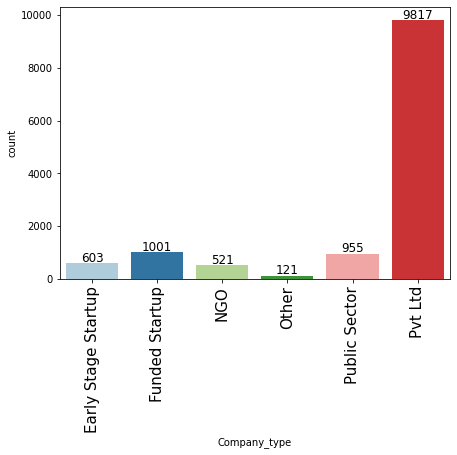

In [26]:
labeled_barplot(Data,'Company_type')

- Most employees are from the private sector, as noted from before

0    14381
1     4777
Name: Target, dtype: int64


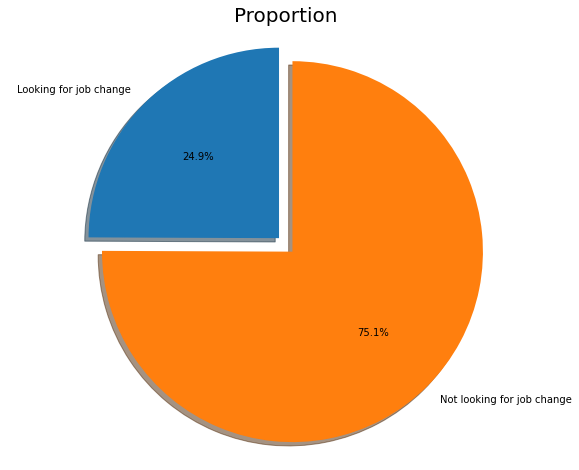

In [27]:
print(Data.Target.value_counts())
labels = 'Looking for job change', 'Not looking for job change'
sizes = [Data.Target[Data['Target']==1].count(),Data.Target[Data['Target']==0].count()]
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion', size = 20)
plt.show()

- This shows that only 25% of employees are actually looking for a job change. Hence, this dataset and the problem statement represent an example of imbalanced classification.

### **Bivariate Analysis**

In [28]:
#Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):
  fig,axs = plt.subplots(2,2, figsize=(12,10))
  target_uniq = data[target].unique()

  axs[0,0].set_title('Distribution of target for target =' +str(target_uniq[0]))
  sns.histplot(
      data = data[data[target] == target_uniq[0]],
      x =predictor,
      kde= True,
      ax = axs[0,0],
      color = 'teal',
  )
  axs[0,1].set_title('Distribution of target for target =' +str(target_uniq[1]))
  sns.histplot(
      data = data[data[target] == target_uniq[1]],
      x =predictor,
      kde= True,
      ax = axs[0,1],
      color = 'orange',
  )

  axs[1,0].set_title('Boxplot w.r.t target')
  sns.boxplot(data = data, x = target, y= predictor, ax = axs[1,0], palette = 'gist_rainbow')
  
  axs[1,1].set_title('Boxplot (without outliers) w.r.t target')
  sns.boxplot(
      data = data,
      x =target,
      y =predictor,
      ax = axs[1,1],
      showfliers = False,
      palette = 'gist_rainbow',
  )
  plt.tight_layout()
  plt.show()

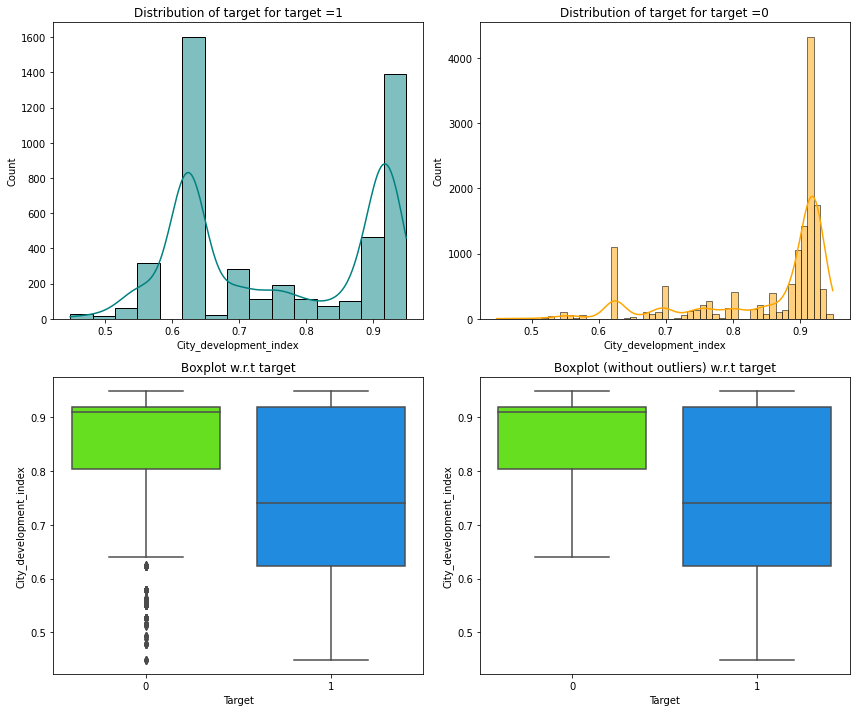

In [29]:
distribution_plot_wrt_target(Data,'City_development_index','Target')

- We observe that employees from cities having a development index of over 0.9 are not willing to switch their jobs

In [30]:
#function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor],data[target],margins=True).sort_values(by=sorter, ascending = False)
  print(tab1)
  print('-'*120)
  tab= pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)
  tab.plot(kind = 'bar', stacked = True, figsize=(count+1, 5))
  plt.legend(loc = 'lower left', frameon=False)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
  plt.show()

Target      0     1    All
Gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


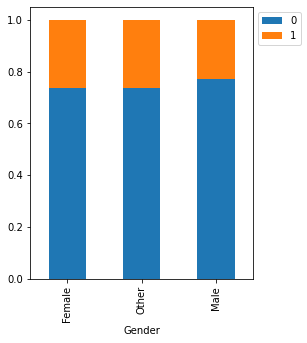

In [31]:
stacked_barplot(Data, 'Gender', 'Target')

- No clear difference coming out of this analysis, likelihood of gender affecting choise of job switch is not there

Target                       0     1    All
Relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


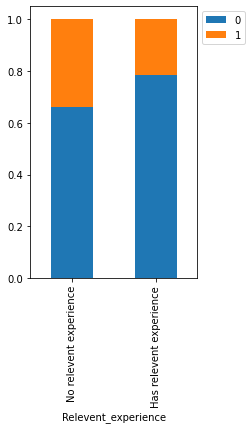

In [32]:
stacked_barplot(Data, 'Relevent_experience', 'Target')

- Employees with no relevant job experience are more likely to be switching their jobs

Target                   0     1    All
Enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


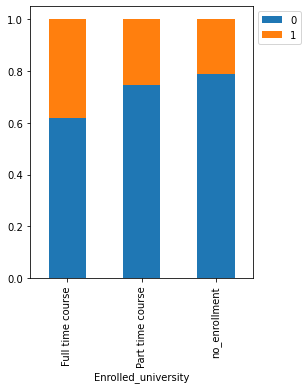

In [33]:
stacked_barplot(Data, 'Enrolled_university', 'Target')

- Employees who opted for full time courses in university are more likely to be trying to switch jobs

Target               0     1    All
Education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


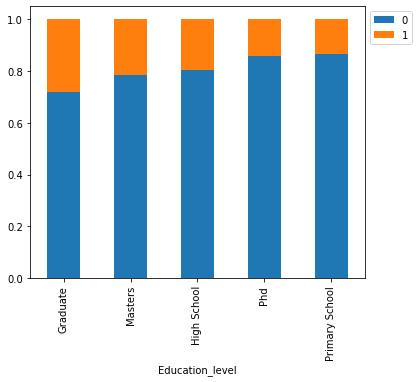

In [34]:
stacked_barplot(Data, 'Education_level', 'Target')

- The highly learned employees are more likely to switch their jobs|

Target                0     1    All
Major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


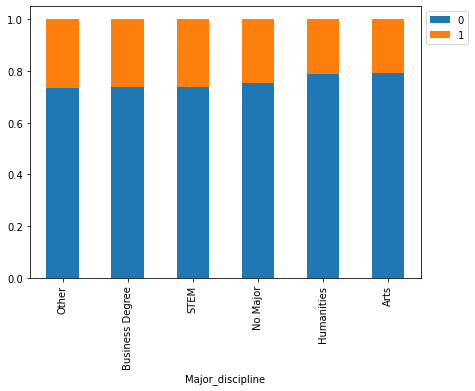

In [35]:
stacked_barplot(Data, 'Major_discipline', 'Target')

- Slight higher chances that employees who took up STEM and business course would want ot change jobs

Target          0     1    All
Experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


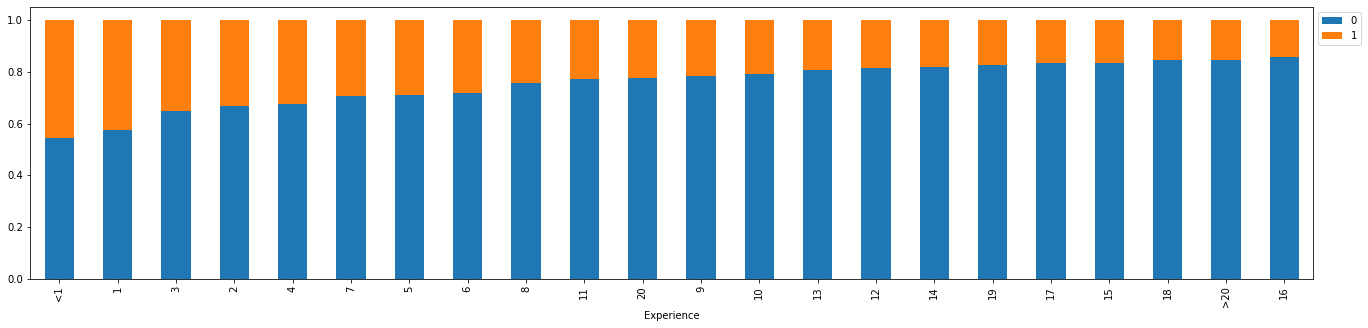

In [36]:
stacked_barplot(Data, 'Experience', 'Target')

- Employees with less years of experience highly likeley to change their jobs

Target            0     1    All
Last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


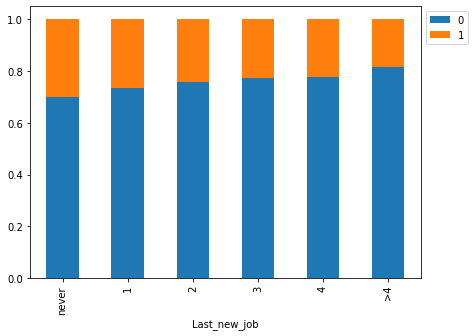

In [37]:
stacked_barplot(Data, 'Last_new_job', 'Target')

- Employees who have never switched their jobs before are the most likelyto be looking for a job change

In [38]:
#Dropping columns as they will not add value to the modelling
Data.drop(['Company_size','Gender','City'], axis = 1, inplace = True)

In [39]:
#Separating all the categorical columns for imputation
cat_col_df = Data.drop(['City_development_index','Training_hours','Target'], axis= 1)

### Missing Value Imputation

In [40]:
#We impute missing values in coumns using their mode as they are categorical variable
X = Data.drop(['Target'], axis = 1)
Y = Data[['Target']]

In [41]:
Y.head()

,Target
0,1
1,0
2,0
3,1
4,0


In [42]:
#Splitting the data set into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify =Y)

In [43]:
X_train.isnull().sum()

City_development_index       0
Relevent_experience          0
Enrolled_university        317
Education_level            362
Major_discipline          2258
Experience                  50
Company_type              4881
Last_new_job               343
Training_hours               0
dtype: int64

In [44]:
imputer_mode = SimpleImputer(strategy = 'most_frequent')
X_train[['Enrolled_university','Education_level','Major_discipline','Experience','Company_type','Last_new_job']]=imputer_mode.fit_transform(
    X_train[['Enrolled_university','Education_level','Major_discipline','Experience','Company_type','Last_new_job']])
X_test[['Enrolled_university','Education_level','Major_discipline','Experience','Company_type','Last_new_job']]=imputer_mode.fit_transform(
    X_test[['Enrolled_university','Education_level','Major_discipline','Experience','Company_type','Last_new_job']])

In [45]:
#Now check again for missing values
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

City_development_index    0
Relevent_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64
------------------------------
City_development_index    0
Relevent_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64


**Encoding Categorical variables**

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencorder_RE = LabelEncoder()
X_train['Relevent_experience'] = labelencorder_RE.fit_transform(X_train['Relevent_experience'])
X_test['Relevent_experience'] = labelencorder_RE.fit_transform(X_test['Relevent_experience'])


In [47]:
labelencorder_EN = LabelEncoder()
X_train['Enrolled_university'] = labelencorder_RE.fit_transform(X_train['Enrolled_university'])
X_test['Enrolled_university'] = labelencorder_RE.fit_transform(X_test['Enrolled_university'])

In [48]:
labelencorder_EL = LabelEncoder()
X_train['Education_level'] = labelencorder_RE.fit_transform(X_train['Education_level'])
X_test['Education_level'] = labelencorder_RE.fit_transform(X_test['Education_level'])

In [49]:
labelencorder_MD = LabelEncoder()
X_train['Major_discipline'] = labelencorder_RE.fit_transform(X_train['Major_discipline'])
X_test['Major_discipline'] = labelencorder_RE.fit_transform(X_test['Major_discipline'])

In [50]:
labelencorder_EX = LabelEncoder()
X_train['Experience'] = labelencorder_RE.fit_transform(X_train['Experience'])
X_test['Experience'] = labelencorder_RE.fit_transform(X_test['Experience'])

In [51]:
labelencorder_CT = LabelEncoder()
X_train['Company_type'] = labelencorder_RE.fit_transform(X_train['Company_type'])
X_test['Company_type'] = labelencorder_RE.fit_transform(X_test['Company_type'])

In [52]:
labelencorder_LNJ = LabelEncoder()
X_train['Last_new_job'] = labelencorder_RE.fit_transform(X_train['Last_new_job'])
X_test['Last_new_job'] = labelencorder_RE.fit_transform(X_test['Last_new_job'])

In [53]:
X_train.head()

,City_development_index,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_type,Last_new_job,Training_hours
17855,0.624,0,2,0,5,1,5,0,90
17664,0.920,1,2,4,5,15,5,5,15
13404,0.896,0,2,0,5,3,2,4,36
13366,0.920,0,2,0,5,15,1,0,53
15670,0.855,0,0,0,5,15,5,0,158


In [54]:
y_train.head()

,Target
17855,0
17664,0
13404,0
13366,0
15670,1


In [55]:
#Checking the shape of train and test data sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15326, 9)
(3832, 9)
(15326, 1)
(3832, 1)


## Model Building

**A model can make wrong predictions in the following ways:**
- Predict an employee is lokking for a job when he is not looking for a job
- Predict an employee is not looking for a job when infact he is looking for a job

**Which case is more important**
- Both cases are important to consider for the purpose of this study.

**How do we reduce the loss in this case**
- Since both errors are importnat for us to minimize, the company would want the f1 score evaluation to be maximized as it covers both accuracy and recall scores.

### Model 1

In [56]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [57]:
#Initializing the ANN - Artificial Neural Network
model = Sequential()
model.add(Dense(activation = 'relu', input_dim =9, units = 64)) #Define the number of hidden units
#Add first hidden layer
model.add(Dense(32,activation='relu'))
#Adding the output layer, we use sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [58]:
#Create optimizer with default learning rate and compile the model
model.compile(optimizer ='SGD',loss = 'binary_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs =50, batch_size = 32, verbose = 1)

Epoch 1/50
384/384 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.7433 - val_loss: 0.6449 - val_accuracy: 0.7515
Epoch 2/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5688 - accuracy: 0.7503 - val_loss: 0.5592 - val_accuracy: 0.7515
Epoch 3/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5615 - accuracy: 0.7504 - val_loss: 0.5545 - val_accuracy: 0.7515
Epoch 4/50
384/384 [==============================] - 1s 1ms/step - loss: 0.5611 - accuracy: 0.7504 - val_loss: 0.5567 - val_accuracy: 0.7515
Epoch 5/50
384/384 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7504 - val_loss: 0.5725 - val_accuracy: 0.7515
Epoch 6/50
384/384 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7504 - val_loss: 0.6058 - val_accuracy: 0.7515
Epoch 7/50
384/384 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7504 - val_loss: 0.5530 - val_accuracy: 0.7515
Epoch 

120/120 [==============================] - 0s 941us/step - loss: 0.5394 - accuracy: 0.7510


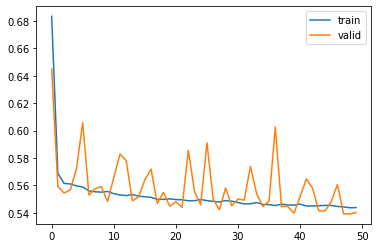

In [61]:
#Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'valid'), loc = 0)

#printing results
results = model.evaluate(X_test, y_test)

- There is noise in the loss behavior here. 

In [62]:
#Checking other metrics
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [63]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories = 'auto',
                          count = True,
                          percent = True,
                          cbar= True,
                          xyticks = True,
                          xyplotlabels = True,
                          sum_stats = True,
                          figsize=None,
                          cmap = 'Blues',
                          title='None'                      
                          ):
  #Code to generate text inside each square
  blanks = ['' for i in range(cf.size)]

  if group_names and len(group_names)== cf.size:
    group_labels = ["{}\n".format(value) for value in group_names]
  else:
    group_labels = blanks

  if count:
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
  else:
    group_counts = blanks
  if percent:
    group_percentages =  ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
  else:
    group_percentages = blanks
  
  box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
  
  #Code to generate Summary statistics and text for summary stats
  if sum_stats:
    accuracy = np.trace(cf)/ float(np.sum(cf))

  #Set figure parameters according to other arguments
  if figsize == None:
    figsize = plt.rcParams.get('figure.figsize') # define default figure size if not set

  if xyticks == False:
    categories = False
  
  #Make the heatmap visualization
  plt.figure(figsize= figsize)
  sns.heatmap(cf,annot= box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels= categories, yticklabels = categories)

  if title:
    plt.title(title)
  

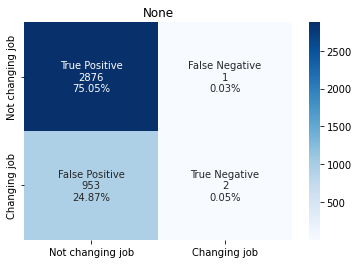

In [64]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm,group_names = labels, categories = categories, cmap = 'Blues')

- The 0.03% of FN is coz we used 0.5 as the threshold to the model, we should calculate the threshold using the AUC-ROC curve

In [65]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2877
           1       0.67      0.00      0.00       955

    accuracy                           0.75      3832
   macro avg       0.71      0.50      0.43      3832
weighted avg       0.73      0.75      0.65      3832



- Model has a good accuracy of 75% but poor f1 score. 
- FP are also high
- Let us try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyper parameters in order to improve the models perfomance.

## Model 2

In [66]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [67]:
model1 = Sequential()
model1.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform', input_dim=(X_train.shape[1]))) #Define the number of hidden units
model1.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer = 'he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
#Compiling ANN with Adam Optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])

In [68]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [69]:
history1 = model1.fit(X_train, y_train, batch_size = 64, epochs =50, verbose = 1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 3ms/step - loss: 1.2935 - accuracy: 0.6873 - val_loss: 0.6454 - val_accuracy: 0.6171
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.7130 - val_loss: 0.5453 - val_accuracy: 0.7508
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 0.6317 - accuracy: 0.7223 - val_loss: 0.6025 - val_accuracy: 0.7508
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7347 - val_loss: 0.5498 - val_accuracy: 0.7492
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7376 - val_loss: 0.5569 - val_accuracy: 0.7482
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.7346 - val_loss: 0.5671 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7393 - val_loss: 0.5399 - val_accuracy: 0.7498
Epoch 

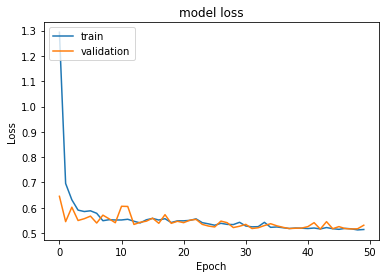

In [70]:
#Plotting training vs validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

As we increase the depth of the neural network and change the optimizer to Adam, we can see smoother loss curves for both train and validation

Best threshold= 0.210995, G-Mean=0.666


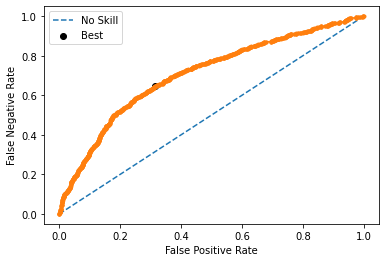

In [71]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat1 = model1.predict(X_test)
#Keep probabilities for the positive outcome only
yhat1 = yhat1[:,0]
#Calculate the roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
#Calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds1[ix], gmeans1[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

Predicting results using best as a threshold

In [72]:
y_pred_e1 = model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

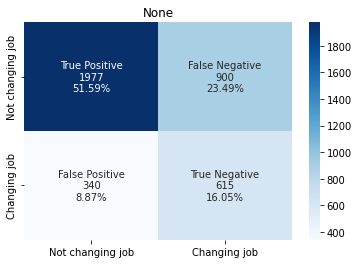

In [73]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm1,group_names = labels, categories = categories, cmap = 'Blues')

In [74]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr = metrics.classification_report(y_test, y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      2877
           1       0.41      0.64      0.50       955

    accuracy                           0.68      3832
   macro avg       0.63      0.67      0.63      3832
weighted avg       0.74      0.68      0.70      3832



As the number of layers in the neural network has increased, we can see that the macro F1 score has increased, and the false negative percentage has decreased.

We will now try **Batch normalization** and check to see if we can increase the F1 score.

## Model 3

In [75]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [76]:
model2 = Sequential()
model2.add(Dense(128, activation = 'relu',input_dim=X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer = 'he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [77]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [78]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])

In [79]:
history2 = model2.fit(X_train, y_train, batch_size = 64, epochs =50, verbose = 1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5691 - accuracy: 0.7409 - val_loss: 0.5566 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7480 - val_loss: 0.5418 - val_accuracy: 0.7554
Epoch 3/50
192/192 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7505 - val_loss: 0.5504 - val_accuracy: 0.7573
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7588 - val_loss: 0.5090 - val_accuracy: 0.7586
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7586 - val_loss: 0.5424 - val_accuracy: 0.7505
Epoch 6/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7596 - val_loss: 0.5139 - val_accuracy: 0.7616
Epoch 7/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7631 - val_loss: 0.5089 - val_accuracy: 0.7577
Epoch 

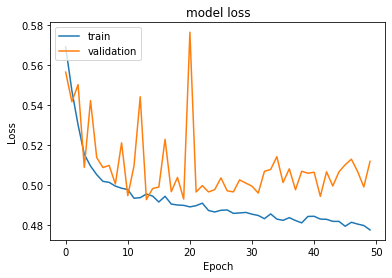

In [80]:
#Plotting training vs validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- There is a lot of noise in this model and it seems to have over fitted on the training data as there is significance difference in perfomance between train and validation

Best threshold= 0.227820, G-Mean=0.697


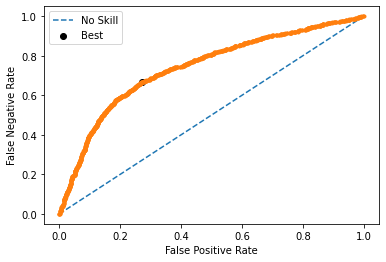

In [81]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat2 = model2.predict(X_test)
#Keep probabilities for the positive outcome only
yhat2 = yhat2[:,0]
#Calculate the roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
#Calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds2[ix], gmeans2[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [82]:
y_pred_e2 = model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

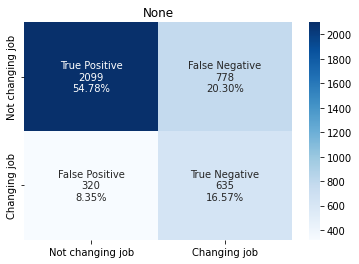

In [83]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm2,group_names = labels, categories = categories, cmap = 'Blues')

In [84]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr = metrics.classification_report(y_test, y_pred_e2)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      2877
           1       0.45      0.66      0.54       955

    accuracy                           0.71      3832
   macro avg       0.66      0.70      0.66      3832
weighted avg       0.76      0.71      0.73      3832



- Train and validation curves seem to show overfitting
- Let us try to use the dropout technique and check to see if it can reduce the FN rate

### Model 4

In [85]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [86]:
model3 = Sequential()
model3.add(Dense(256, activation = 'relu',input_dim=X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [87]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [88]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])

In [89]:
history3 = model3.fit(X_train, y_train, batch_size = 64, epochs =50, verbose = 1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 3ms/step - loss: 0.6613 - accuracy: 0.7186 - val_loss: 0.5839 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5803 - accuracy: 0.7481 - val_loss: 0.5729 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5698 - accuracy: 0.7498 - val_loss: 0.5585 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.7499 - val_loss: 0.5562 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5606 - accuracy: 0.7502 - val_loss: 0.5584 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5588 - accuracy: 0.7498 - val_loss: 0.5526 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5543 - accuracy: 0.7504 - val_loss: 0.5443 - val_accuracy: 0.7515
Epoch 

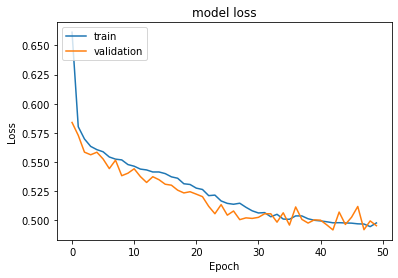

In [90]:
#Plotting training vs validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- Both the train and validation curves are smooth

Best threshold= 0.275509, G-Mean=0.706


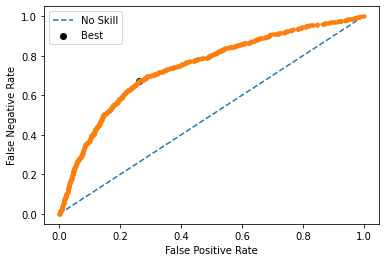

In [91]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat3 = model3.predict(X_test)
#Keep probabilities for the positive outcome only
yhat3 = yhat3[:,0]
#Calculate the roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
#Calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds3[ix], gmeans3[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [92]:
y_pred_e3 = model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

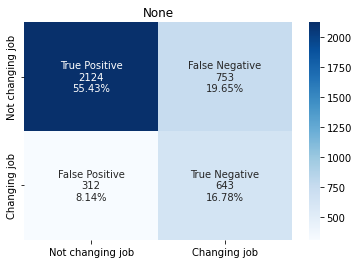

In [93]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm3,group_names = labels, categories = categories, cmap = 'Blues')

In [94]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr = metrics.classification_report(y_test, y_pred_e3)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2877
           1       0.46      0.67      0.55       955

    accuracy                           0.72      3832
   macro avg       0.67      0.71      0.67      3832
weighted avg       0.77      0.72      0.74      3832



- The dropout technique helped the model reduce the loss function of both train and validation. The F1 score alsos eems to be fine with a decrease in the false negative rate.

- We will now try to use some hyper parameter optimization techniques such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model. 

### Model 5

**Random Search CV**

Some of the important hyperparameters to look out for while optimizing neural networs are:
- Type of architecture
- Number of layers
- Number of neurons in a layer
- Regularization hyper parameters
- Learning rate
- Type of optimizer
- Dropout rate

In [95]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [96]:
def create_model_v4(lr, batch_size):
  np.random.seed(1337)
  model = Sequential()
  model.add(Dense(256, activation = 'relu',input_dim=X_train.shape[1]))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
  return model


- We are using random search to optimize two hyper parameters **Batch size and Learning Rate**

In [97]:
keras_estimator  = KerasClassifier(build_fn= create_model_v4, verbose = 1)

#Define the grid search parameters
param_random = {
    'batch_size': [32,64,128],
    'lr':[0.01,0.1, 0.001],}
  
kfold_splits = 3
random = RandomizedSearchCV(estimator= keras_estimator,
                            verbose = 1,
                            cv = kfold_splits,
                            param_distributions= param_random, n_jobs = -1)

In [98]:
random_result = random.fit(X_train, y_train, validation_split = 0.2, verbose = 1)

#Summarize results
print('Best: %f using %s' %(random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
384/384 [==============================] - 2s 3ms/step - loss: 0.6440 - accuracy: 0.7415 - val_loss: 0.5613 - val_accuracy: 0.7515
Best: 0.750620 using {'lr': 0.01, 'batch_size': 32}


- The best model is the one with a batch size of 32 and a learning rate of 0.01.
- Therefore, we create a final model with the above configuration

In [99]:
estimator_v4 = create_model_v4(batch_size = random_result.best_params_['batch_size'], lr = random_result.best_params_['lr'])
estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [100]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
history4 = estimator_v4.fit(X_train, y_train, batch_size = 64, epochs =50, verbose = 1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6643 - accuracy: 0.7405 - val_loss: 0.5677 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.7502 - val_loss: 0.5619 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5602 - accuracy: 0.7504 - val_loss: 0.5558 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5591 - accuracy: 0.7504 - val_loss: 0.5578 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.7504 - val_loss: 0.5510 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.7499 - val_loss: 0.5562 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5540 - accuracy: 0.7499 - val_loss: 0.5470 - val_accuracy: 0.7515
Epoch 

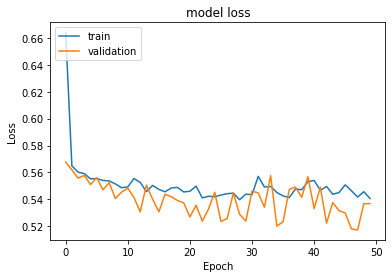

In [101]:
#Plotting training vs validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- We observe noise in the training behaviour of the model

Best threshold= 0.255869, G-Mean=0.625


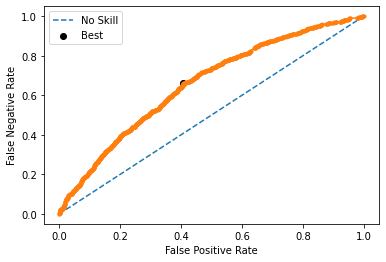

In [102]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat4 = estimator_v4.predict(X_test)
#Keep probabilities for the positive outcome only
yhat4 = yhat4[:,0]
#Calculate the roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
#Calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds4[ix], gmeans4[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [103]:
y_pred_e4 = estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

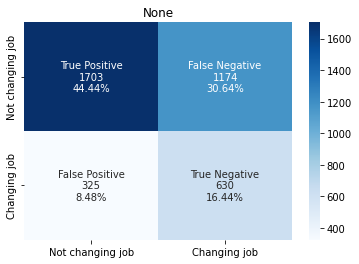

In [104]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm4,group_names = labels, categories = categories, cmap = 'Blues')

In [105]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr4 = metrics.classification_report(y_test, y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      2877
           1       0.35      0.66      0.46       955

    accuracy                           0.61      3832
   macro avg       0.59      0.63      0.58      3832
weighted avg       0.72      0.61      0.64      3832



- The F1 score has decreased, becasue Random search CV will choose the hyperparameters randomly and hence has a very low chance of finding a highly optimal configuration.
-Let us use the more exhaustive Grid Search CV and see if the F1 score increases.

### Model 6

**Grid Search CV**

In [106]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [107]:
def create_model_v5(lr, batch_size):
  np.random.seed(1337)
  model = Sequential()
  model.add(Dense(256, activation = 'relu',input_dim=X_train.shape[1]))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
  return model

In [120]:
keras_estimator  = KerasClassifier(build_fn= create_model_v5, verbose = 1)

#Define the grid search parameters
param_grid = {
    'batch_size': [64,32,128],
    'lr':[0.01,0.1, 0.001],}
  
kfold_splits = 3
grid = GridSearchCV(estimator= keras_estimator,
                            verbose = 1,
                            cv = kfold_splits,
                            param_grid= param_grid, n_jobs = -1)

In [121]:
import time
begin = time.time() #store starting time

grid_result = grid.fit(X_train, y_train, validation_split = 0.2, verbose = 1)

#Summarize results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
end = time.time() # store end time

print(f'Total runtime of the program is {end - begin}') # show total time taken


Fitting 3 folds for each of 9 candidates, totalling 27 fits
192/192 [==============================] - 1s 4ms/step - loss: 0.6248 - accuracy: 0.7411 - val_loss: 0.5589 - val_accuracy: 0.7515
Best: 0.750620 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 36.62469434738159


- The best model has a configuration of batch size of 64 and a learning rate of 0.01.
- Let us create the final model with these configurations 

In [110]:
estimator_v5 = create_model_v5(batch_size = random_result.best_params_['batch_size'], lr = random_result.best_params_['lr'])
estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [111]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v5.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
history5 = estimator_v5.fit(X_train, y_train, batch_size = 64, epochs =50, verbose = 1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6643 - accuracy: 0.7405 - val_loss: 0.5677 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.7502 - val_loss: 0.5619 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5602 - accuracy: 0.7504 - val_loss: 0.5558 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5591 - accuracy: 0.7504 - val_loss: 0.5578 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.7504 - val_loss: 0.5510 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.7499 - val_loss: 0.5562 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5540 - accuracy: 0.7499 - val_loss: 0.5470 - val_accuracy: 0.7515
Epoch 

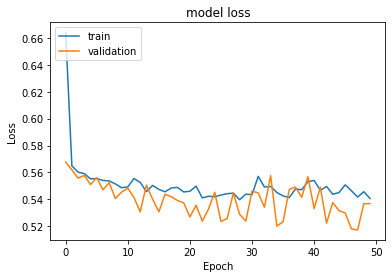

In [112]:
#Plotting training vs validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- We observe that the curves for train and validation are both smooth

Best threshold= 0.255869, G-Mean=0.625


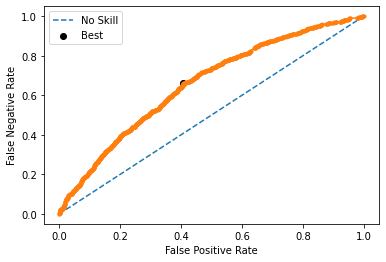

In [113]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat5 = estimator_v5.predict(X_test)
#Keep probabilities for the positive outcome only
yhat5 = yhat5[:,0]
#Calculate the roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
#Calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds5[ix], gmeans5[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [114]:
y_pred_e5 = estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

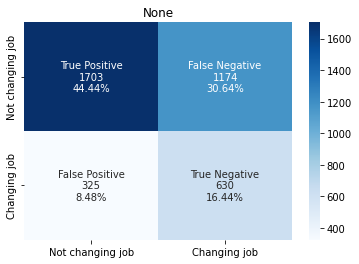

In [115]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm5,group_names = labels, categories = categories, cmap = 'Blues')

In [116]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr5 = metrics.classification_report(y_test, y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      2877
           1       0.35      0.66      0.46       955

    accuracy                           0.61      3832
   macro avg       0.59      0.63      0.58      3832
weighted avg       0.72      0.61      0.64      3832



- Hyper parameter tuning with grid search has been used here to get better F1 score, but this F1 score might differ each time. Other hyper parameters can be used to get better metrics. 
- Hence the F1 score of the model while better than the randomized search, is slightly lower than the dropuout model in model 4.

## **Dask**

Dask is a library that is utilized in industry to scale for perfomance due to its parallelized computing procedure.
Dask has the option of implementing Grid Search similar to the Grid Search in Sci Kit Learn.

In [117]:
!pip install dask-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 13.1 MB/s 


In [118]:
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV 

In [119]:
def create_model_v6(lr, batch_size):
  np.random.seed(1337)
  model = Sequential()
  model.add(Dense(256, activation = 'relu',input_dim=X_train.shape[1]))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
  return model

In [123]:
keras_estimator  = KerasClassifier(build_fn= create_model_v6, verbose = 1)

#Define the grid search parameters
param_grid = {
    'batch_size': [64,32,128],
    'lr':[0.01,0.1, 0.001],}
  
kfold_splits = 3
dask = DaskGridSearchCV(estimator= keras_estimator,
                            cv = kfold_splits,
                            param_grid= param_grid, n_jobs = -1)

In [124]:
import time
begin = time.time() #store starting time

dask_result = dask.fit(X_train, y_train, validation_split = 0.2, verbose = 1)

#Summarize results
print('Best: %f using %s' %(dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
end = time.time() # store end time

print(f'Total runtime of the program is {end - begin}') # show total time taken

192/192 [==============================] - 1s 4ms/step - loss: 0.6519 - accuracy: 0.7405 - val_loss: 0.5597 - val_accuracy: 0.7515
Best: 0.750620 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 45.61300349235535


- Unfortunately, dask is taking more time to run as compared to grid search cv, that is 45 sec to 36 sec.
- Dask shows some improvement in computation when the dimension and range of hyperparameters we are tuning is large

**We can also use another optimization technique called Keras Tuner**

In [125]:
#Install Keras Tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 12.7 MB/s 
     |████████████████████████████████| 1.6 MB 80.5 MB/s 


In [126]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [127]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
- How many hidden layers should the model have
- How many neurons should the model have in each hidden layer
- What should be the learning rate

In [128]:
def build_model(h):
  model = keras.Sequential()
  for i in range (h.Int('num_layers',2,10)):
    model.add(layers.Dense(units = h.Int('units_'+ str(i),
                                         min_value = 32,
                                         max_value = 256,
                                         step = 32),
                           activation = 'relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer = keras.optimizers.Adam(
            h.Choice('learning_rate',[1e-2, 1e-3,1e-4])),
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
    return model

Initialize a tuner here (i.e Random search here), we use objective to specify the objective to select the best models and we use max_trials to specify the number of different models to try

In [129]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    project_name = 'Job_'
)

In [130]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [131]:
#Searching the best model on X and Y train
tuner.search(X_train, y_train, epochs = 5, validation_split = 0.2)

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.7617960373560587

Best val_accuracy So Far: 0.7617960373560587
Total elapsed time: 00h 01m 11s


In [132]:
#Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.01
Score: 0.7617960373560587
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
learning_rate: 0.001
Score: 0.7573385636011759
Trial summary
Hyperparameters:
num_layers: 5
units_0: 224
learning_rate: 0.01
Score: 0.7554903229077657
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
learning_rate: 0.0001
Score: 0.7517938613891602
Trial summary
Hyperparameters:
num_layers: 6
units_0: 128
learning_rate: 0.0001
Score: 0.7515764236450195


## Model 7

Let us create a model with the above mentioned best configuration given by Keras Tuner

In [133]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [134]:
model7 = Sequential()
model7.add(Dense(160, activation = 'relu', kernel_initializer = 'he_uniform', input_dim=(X_train.shape[1]))) #Define the number of hidden units
model7.add(Dense(160,activation='relu',kernel_initializer = 'he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer = 'he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer = 'he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [135]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [136]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])

In [137]:
history_7 = model7.fit(X_train, y_train, validation_split = 0.2, epochs =50, batch_size = 64, verbose = 1)

Epoch 1/50
192/192 [==============================] - 3s 9ms/step - loss: 0.9454 - accuracy: 0.6951 - val_loss: 0.5562 - val_accuracy: 0.7505
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6206 - accuracy: 0.7258 - val_loss: 0.5691 - val_accuracy: 0.7384
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6074 - accuracy: 0.7289 - val_loss: 0.5682 - val_accuracy: 0.7502
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5875 - accuracy: 0.7392 - val_loss: 0.5450 - val_accuracy: 0.7518
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5642 - accuracy: 0.7426 - val_loss: 0.5928 - val_accuracy: 0.7524
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5650 - accuracy: 0.7468 - val_loss: 0.5595 - val_accuracy: 0.7508
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5584 - accuracy: 0.7472 - val_loss: 0.5511 - val_accuracy: 0.7518
Epoch 

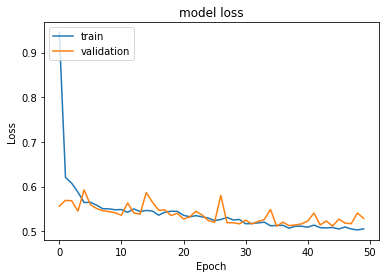

In [139]:
#Plotting training vs validation loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

Best threshold= 0.168312, G-Mean=0.674


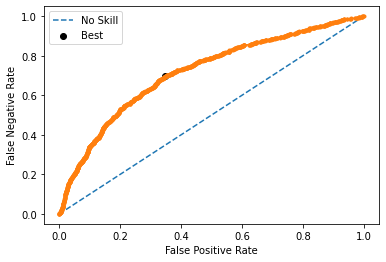

In [140]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat7 = model7.predict(X_test)
#Keep probabilities for the positive outcome only
yhat7 = yhat7[:,0]
#Calculate the roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
#Calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds7[ix], gmeans7[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [157]:
y_pred_e7 = model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

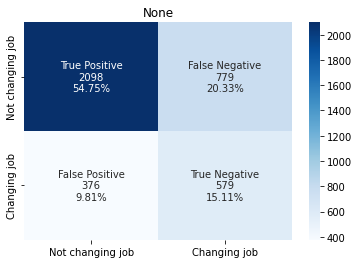

In [158]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm7,group_names = labels, categories = categories, cmap = 'Blues')

In [143]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr7 = metrics.classification_report(y_test, y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      2877
           1       0.35      0.75      0.48       955

    accuracy                           0.59      3832
   macro avg       0.61      0.65      0.57      3832
weighted avg       0.74      0.59      0.62      3832



- After using the suggested hyper parameters from Keras Tuner, the F1 score has slightly increased, and the false Negative rate is higher in comparison to the previous optimization technique model.
- You can add batch normalization and drop out technique to the model and check if there are any improvements on the F1 score.
- Let's try to apply SMOTE to balance this dataset and then apply hyperparameter tuning accordingly.

### **SMOTE + Keras Tuner**

In [144]:
#Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
X_sm, y_sm =  smote.fit_resample(X_train, y_train)

In [145]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [146]:
def build_model_2(h):
  model = keras.Sequential()
  for i in range (h.Int('num_layers',2,10)):
    model.add(layers.Dense(units = h.Int('units_'+ str(i),
                                         min_value = 32,
                                         max_value = 256,
                                         step = 32),
                           activation = 'relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer = keras.optimizers.Adam(
            h.Choice('learning_rate',[1e-2, 1e-3,1e-4])),
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
    return model

In [147]:
tuner_2 = RandomSearch(
    build_model_2,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    project_name = 'Job_Switch'
)

In [148]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [149]:
tuner_2.search(X_sm, y_sm, epochs = 5, validation_split = 0.2)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.7093292872111002

Best val_accuracy So Far: 0.7741561532020569
Total elapsed time: 00h 01m 44s


In [150]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 224
learning_rate: 0.01
Score: 0.7741561532020569
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
learning_rate: 0.001
Score: 0.7391713857650757
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.01
Score: 0.7093292872111002
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
learning_rate: 0.0001
Score: 0.27321454882621765
Trial summary
Hyperparameters:
num_layers: 6
units_0: 128
learning_rate: 0.0001
Score: 0.2489497313896815


In [151]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [152]:
model9 = Sequential()
model9.add(Dense(160, activation = 'relu', kernel_initializer = 'he_uniform', input_dim=(X_train.shape[1]))) #Define the number of hidden units
model9.add(Dense(160,activation='relu',kernel_initializer = 'he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer = 'he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer = 'he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])

In [153]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,345
Trainable params: 121,345
Non-trai

In [154]:
history_9 = model9.fit(X_sm, y_sm, validation_split = 0.2, epochs =50, batch_size = 64, verbose = 1)

Epoch 1/50
288/288 [==============================] - 3s 7ms/step - loss: 0.9861 - accuracy: 0.5922 - val_loss: 0.8846 - val_accuracy: 0.2199
Epoch 2/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6754 - accuracy: 0.6200 - val_loss: 0.6779 - val_accuracy: 0.5980
Epoch 3/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6589 - accuracy: 0.6270 - val_loss: 1.5187 - val_accuracy: 0.0752
Epoch 4/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6510 - accuracy: 0.6304 - val_loss: 0.6540 - val_accuracy: 0.6558
Epoch 5/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6523 - accuracy: 0.6307 - val_loss: 0.9692 - val_accuracy: 0.0398
Epoch 6/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6444 - accuracy: 0.6365 - val_loss: 1.0116 - val_accuracy: 0.1037
Epoch 7/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6397 - accuracy: 0.6387 - val_loss: 0.9368 - val_accuracy: 0.2462
Epoch 

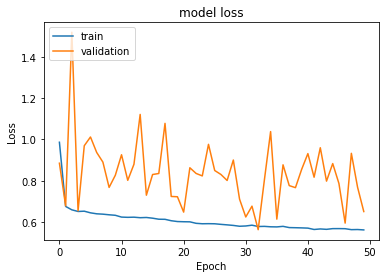

In [155]:
#Plotting training vs validation loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- We observe a lot of noise in the model

Best threshold= 0.200032, G-Mean=0.680


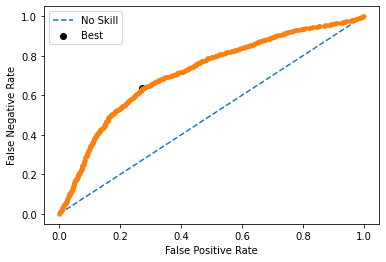

In [156]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat9 = model9.predict(X_test)
#Keep probabilities for the positive outcome only
yhat9 = yhat9[:,0]
#Calculate the roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
#Calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds7[ix], gmeans9[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [159]:
y_pred_e9 = model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds7[ix])
y_pred_e9

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

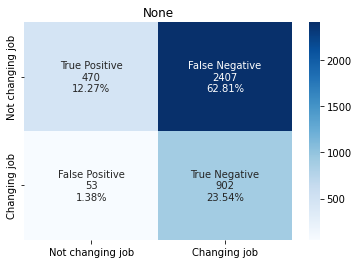

In [160]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9 = confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm9,group_names = labels, categories = categories, cmap = 'Blues')

In [161]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr9 = metrics.classification_report(y_test, y_pred_e9)
print(cr9)

              precision    recall  f1-score   support

           0       0.90      0.16      0.28      2877
           1       0.27      0.94      0.42       955

    accuracy                           0.36      3832
   macro avg       0.59      0.55      0.35      3832
weighted avg       0.74      0.36      0.31      3832



**Using Gridsearch CV with Smote**

In [162]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [163]:
def create_model_v7(lr, batch_size):
  np.random.seed(1337)
  model = Sequential()
  model.add(Dense(256, activation = 'relu',input_dim=X_train.shape[1]))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
  return model

In [164]:
keras_estimator = KerasClassifier(build_fn = create_model_v7, verbose = 1)

In [165]:
keras_estimator

In [166]:
keras_estimator  = KerasClassifier(build_fn= create_model_v6, verbose = 1)

#Define the grid search parameters
param_grid = {
    'batch_size': [32,64,128],
    'lr':[0.01,0.1, 0.001],}
  
kfold_splits = 3
grid = GridSearchCV(estimator= keras_estimator,
                            verbose = 1,
                            cv = kfold_splits,
                            param_grid= param_grid, n_jobs = -1)

grid_result = grid.fit(X_train, y_train, validation_split=0.2, verbose =1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
384/384 [==============================] - 2s 3ms/step - loss: 0.6440 - accuracy: 0.7415 - val_loss: 0.5613 - val_accuracy: 0.7515


In [167]:
#Summarize results
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.750620 using {'batch_size': 32, 'lr': 0.01}


In [168]:
estimator_v7 = create_model_v7(batch_size = grid_result.best_params_['batch_size'], lr = grid_result.best_params_['lr'])
estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [169]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics = ['accuracy'])
history_7 = estimator_v7.fit(X_sm, y_sm, validation_split = 0.2, epochs =50, batch_size = grid_result.best_params_['batch_size'], verbose = 1)

Epoch 1/50
576/576 [==============================] - 3s 3ms/step - loss: 0.7071 - accuracy: 0.6178 - val_loss: 0.9885 - val_accuracy: 0.0000e+00
Epoch 2/50
576/576 [==============================] - 1s 3ms/step - loss: 0.6558 - accuracy: 0.6245 - val_loss: 0.8706 - val_accuracy: 0.0000e+00
Epoch 3/50
576/576 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.6238 - val_loss: 0.9287 - val_accuracy: 0.0000e+00
Epoch 4/50
576/576 [==============================] - 2s 3ms/step - loss: 0.6506 - accuracy: 0.6246 - val_loss: 0.9360 - val_accuracy: 0.0000e+00
Epoch 5/50
576/576 [==============================] - 2s 3ms/step - loss: 0.6464 - accuracy: 0.6251 - val_loss: 0.9396 - val_accuracy: 0.0000e+00
Epoch 6/50
576/576 [==============================] - 2s 4ms/step - loss: 0.6449 - accuracy: 0.6242 - val_loss: 1.0048 - val_accuracy: 0.0000e+00
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6469 - accuracy: 0.6257 - val_loss: 1.0259 - val

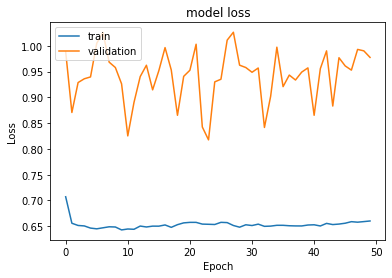

In [170]:
#Plotting training vs validation loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

- There is a lot more noise in the model. Grid Search CV does not seem to work well on the SMOTE data.

Best threshold= 0.376686, G-Mean=0.095


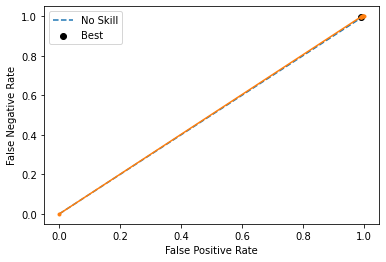

In [172]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#Predict probabilities
yhat10 = estimator_v7.predict(X_test)
#Keep probabilities for the positive outcome only
yhat10 = yhat10[:,0]
#Calculate the roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
#Calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
#Locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best threshold= %f, G-Mean=%.3f'%(thresholds10[ix], gmeans10[ix]))
#plot the roc curve for the model
pyplot.plot([0,1],[0,1], linestyle='--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color = 'black', label = 'Best')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('False Negative Rate')
pyplot.legend()
pyplot.show()

In [173]:
y_pred_e10 = estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

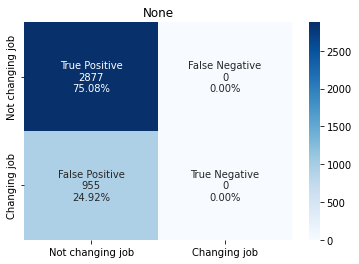

In [174]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm10 = confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['Not changing job', 'Changing job']
make_confusion_matrix(cm10,group_names = labels, categories = categories, cmap = 'Blues')

In [175]:
#Calculating the accuracy scores, f1 and recall
from sklearn import metrics
cr10 = metrics.classification_report(y_test, y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2877
           1       0.00      0.00      0.00       955

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



- Oversampling using SMOTE did not help improve the F1 score.
- Both models have over fitted the training data set
**Therefore, our final model can be Model 4, which uses dropout regularization technique and works on the imbalanced dataset.**

### Suggested Areas of Improvement

- Build any one ML model and use that to get the feature importance of the variables. Try to use that in the neural network model
- You can try to do better feature engineering by removing the flaws of the skewed variables if required.

## Business Recommendations

- The HR department can deply the final model from this exercise to identify with a reasonable degree of accuracy whether an employee is likely to witch jobs or not, and this process seems to be easier and morre time efficient than other methods.